### String methods in pandas

In [4]:
import pandas as pd
orders = pd.read_table('https://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [6]:
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### change datatypes of columns

In [7]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [8]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [9]:
drinks['beer_servings']= drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [10]:
# we can also change the datatype of pandas dataframe columns while reading it
drinks = pd.read_csv('https://bit.ly/drinksbycountry',dtype={'wine_servings':float})
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [11]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [12]:
orders.item_price.str.replace('$','').astype(float).mean()


7.464335785374297

### grouup by data

In [13]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [14]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean','median'])

,count,min,max,mean,median
continent,,,,,
Africa,53,0,376,61.471698,32.0
Asia,44,0,247,37.045455,17.5
Europe,45,0,361,193.777778,219.0
North America,23,1,285,145.434783,143.0
Oceania,16,0,306,89.687500,52.5
South America,12,93,333,175.083333,162.5


<Axes: xlabel='continent'>

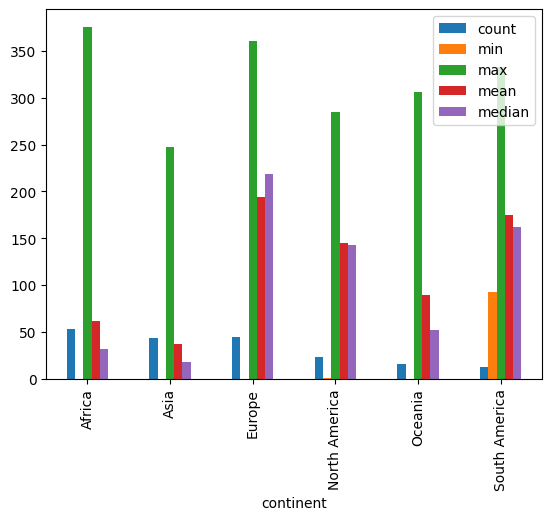

In [15]:
%matplotlib inline

drinks.groupby('continent').beer_servings.agg(['count','min','max','mean','median']).plot(kind='bar')

### explore panda series

In [16]:
movies = pd.read_csv('https://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [17]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [18]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [19]:
movies.genre.value_counts()

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: count, dtype: int64

In [20]:
movies.genre.value_counts(normalize=True)*100
# in percentages

genre
Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Sci-Fi        0.510725
Thriller      0.510725
Film-Noir     0.306435
Family        0.204290
History       0.102145
Fantasy       0.102145
Name: proportion, dtype: float64

In [21]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [22]:
movies.genre.nunique()

16

In [23]:
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

<Axes: ylabel='Frequency'>

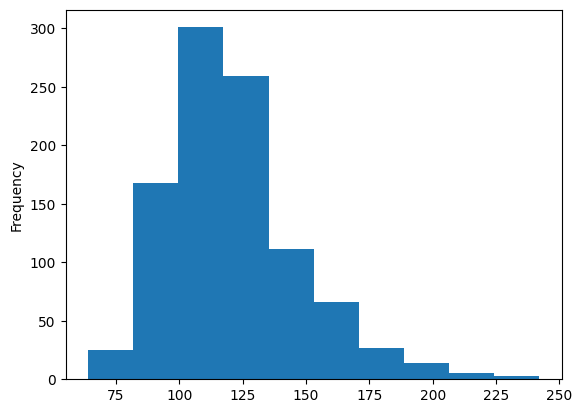

In [25]:
%matplotlib inline
movies.duration.plot(kind='hist')

### Handle missing values in pandas

In [26]:
ufo = pd.read_csv('https://bit.ly/uforeports')
ufo.tail() # here NaN refers to missing value i.e in csv file it would be something like Grant Park,,TRIANGLE .... for the first row shown here

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [27]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [28]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [29]:
ufo.isnull().sum()
#  its count number of null values , it is doing axis=0 by default and converts True to 1 and False to 0 

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [30]:
pd.Series([True,False,True]).sum()

2

In [31]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [32]:
ufo.shape

(18241, 5)

In [34]:
ufo.dropna(how='any').shape 
# this drops all rows which have any value equal to NaN and since this is inplace equals false by default so it does it temporarily

(2486, 5)

In [35]:
ufo.dropna(how='all').shape 
# drops if all columns have NaN which in this case none have 

(18241, 5)

In [36]:
ufo.dropna(subset=['City','Shape Reported'],how='any').shape


(15575, 5)

In [37]:
ufo['Shape Reported'].value_counts()
# by default NaN values are excluded, if you want to include NaN values then use dropna = False in value_counts parameter

Shape Reported
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
PYRAMID         1
FLARE           1
HEXAGON         1
Name: count, dtype: int64

In [38]:
ufo['Shape Reported'].value_counts(dropna=False)

Shape Reported
LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
PYRAMID         1
FLARE           1
HEXAGON         1
Name: count, dtype: int64

In [39]:
ufo['Shape Reported'].fillna(value='This was NaN value before',inplace=True)
ufo['Shape Reported'].value_counts(dropna=False)

Shape Reported
LIGHT                        2803
This was NaN value before    2644
DISK                         2122
TRIANGLE                     1889
OTHER                        1402
CIRCLE                       1365
SPHERE                       1054
FIREBALL                     1039
OVAL                          845
CIGAR                         617
FORMATION                     434
VARIOUS                       333
RECTANGLE                     303
CYLINDER                      294
CHEVRON                       248
DIAMOND                       234
EGG                           197
FLASH                         188
TEARDROP                      119
CONE                           60
CROSS                          36
DELTA                           7
ROUND                           2
CRESCENT                        2
DOME                            1
PYRAMID                         1
FLARE                           1
HEXAGON                         1
Name: count, dtype: int64